In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/Users/matylo/Documents/Reporting-Projet-Annuel/alcrowd/alcrowd_cleaned.csv")

# Trouver les 3000 premiers pid (triés)
first_3000_pids = sorted(df['pid'].unique())[:3000]

# Filtrer les morceaux qui appartiennent à ces playlists
df_3000 = df[df['pid'].isin(first_3000_pids)].copy()

In [4]:
df_3000

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,artist_name,track_uri,artist_uri,track_name,album_uri,track_duration_ms,album_name
0,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,Throwbacks,False,0,2017-04-29,52,47,1,6,11532414,37,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199869,Starting Over,False,2999,2014-12-13,71,67,1,28,16304259,62,66,Dominic Cooper,spotify:track:2sxi3UJLbsIs6p281rARgi,spotify:artist:0F6wZIBwxstvRk9eQtpvOo,"Lay All Your Love On Me - From ""Mamma Mia!"" So...",spotify:album:5KhzAHMfdnBORoub8UYPDC,269440,Mamma Mia! The Movie Soundtrack
199870,Starting Over,False,2999,2014-12-13,71,67,1,28,16304259,62,67,Mikky Ekko,spotify:track:3D1Kbd2pAO9chkd5aEP6q5,spotify:artist:1buzCmyYZE4kcdLRudsb8V,Mourning Doves,spotify:album:6ZM59O9R5zjawLVwCMD2zJ,258653,Time
199871,Starting Over,False,2999,2014-12-13,71,67,1,28,16304259,62,68,Brandi Carlile,spotify:track:2zPaWxKdwaro3UmZ6ZVwfA,spotify:artist:2sG4zTOLvjKG1PSoOyf5Ej,Touching the Ground,spotify:album:1NhFksWs1Nsz6wQI8ysTkv,196760,Give Up The Ghost
199872,Starting Over,False,2999,2014-12-13,71,67,1,28,16304259,62,69,Doom & Gloom,spotify:track:4P75K3ruHef0eP6GSJkncx,spotify:artist:61l8LBmASmaPsm0q7rQF2i,And I Love Her,spotify:album:1wgGprEG5HgYbhFq3eMmtO,203609,Beatles Reimagined


In [5]:
df_3000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199874 entries, 0 to 199873
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   name                  199874 non-null  object
 1   collaborative         199874 non-null  bool  
 2   pid                   199874 non-null  int64 
 3   modified_at           199874 non-null  object
 4   num_tracks            199874 non-null  int64 
 5   num_albums            199874 non-null  int64 
 6   num_followers         199874 non-null  int64 
 7   num_edits             199874 non-null  int64 
 8   playlist_duration_ms  199874 non-null  int64 
 9   num_artists           199874 non-null  int64 
 10  pos                   199874 non-null  int64 
 11  artist_name           199874 non-null  object
 12  track_uri             199874 non-null  object
 13  artist_uri            199874 non-null  object
 14  track_name            199874 non-null  object
 15  album_uri             

In [6]:
df_3000.describe()

,pid,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,track_duration_ms
count,199874.000000,199874.000000,199874.000000,199874.000000,199874.000000,1.998740e+05,199874.000000,199874.000000,1.998740e+05
mean,1492.680669,109.521919,77.979622,2.836127,28.191756,2.550058e+07,57.887704,54.260959,2.334157e+05
std,861.064070,62.674696,47.393599,47.537377,28.677040,1.474878e+07,36.894548,48.050824,7.086663e+04
min,0.000000,5.000000,2.000000,1.000000,2.000000,9.238790e+05,3.000000,0.000000,0.000000e+00
25%,743.000000,56.000000,40.000000,1.000000,7.000000,1.309232e+07,30.000000,17.000000,1.980530e+05
50%,1487.000000,100.000000,70.000000,1.000000,18.000000,2.337600e+07,51.000000,40.000000,2.245730e+05
75%,2234.000000,158.000000,110.000000,2.000000,39.000000,3.621548e+07,78.000000,79.000000,2.577860e+05
max,2999.000000,247.000000,229.000000,2699.000000,178.000000,6.920024e+07,187.000000,246.000000,4.788938e+06


## Hypothèse
Un album est rarement représenté par plus de 2 morceaux dans une playlist

### ACP

In [7]:
# Construction de la matrice playlist × album
pivot_df_3000 = df_3000.pivot_table(index='pid', columns='album_name', values='track_uri', aggfunc='count', fill_value=0)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df_3000)

In [8]:
# Instanciation de l'objet PCA
pca = PCA()

# Application de l'ACP
X_pca = pca.fit_transform(X_scaled)

# Extraction des variances expliquées
explained_variance = pca.explained_variance_ratio_
#print(explained_variance)
cumulative_variance = explained_variance.cumsum()
#print(cumulative_variance)

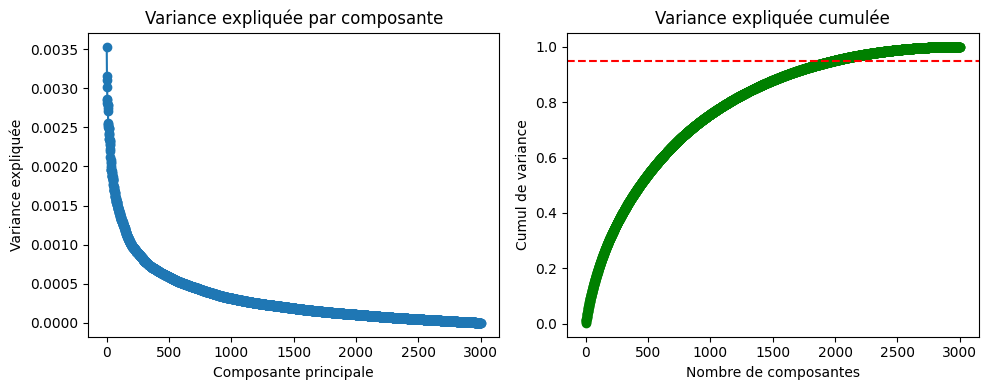

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Variance expliquée par composante
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Variance expliquée par composante")
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée")

# Variance cumulée
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.axhline(0.95, color='red', linestyle='--')
plt.title("Variance expliquée cumulée")
plt.xlabel("Nombre de composantes")
plt.ylabel("Cumul de variance")

plt.tight_layout()
plt.show()

Les premières composantes expliquent un peu plus de 0,3 % de la variance (soit très peu). De plus, La courbe décroît rapidement : il y a beaucoup de composantes, mais chacune apporte peu d'information.

On peut en conclure qu'aucune composante individuelle n'explique une part significative de la variance.
L'information est très diluée entre les dimensions → pas de structure dominante.

Variance expliquée cumulée
Il faut conserver ~2000 composantes pour expliquer 95 % de la variance.
Cela veut dire que les playlists sont très diverses, aucune structure simple ne permet de les représenter en peu de dimensions.

Ce résultat pourrait confirmer notre hypothèse selon laquelle un album est rarement représenté par plus de 2 morceaux dans une playlist car les 2000 composantes pour expliquer 95 % de la variance suggèrent une très grande diversité d’albums dans les playlists.

K-means serait peut être plus adapté au jeu de données.

### K-means

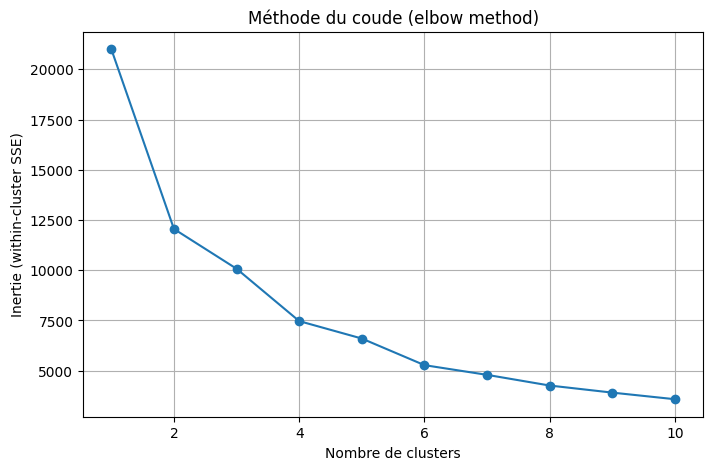

In [11]:
# 1. Calcul de la variable max_tracks_per_album (nombre maximum de morceaux provenant du même album dans la playlist)
max_per_album = df_3000.groupby(['pid', 'album_name']).size().reset_index(name='count')
max_tracks_per_album = max_per_album.groupby('pid')['count'].max().reset_index(name='max_tracks_per_album')

# 2. Agrégation des autres infos playlist
playlist_features = df_3000.groupby('pid').agg({
    'num_tracks': 'first',
    'num_albums': 'first',
    'num_artists': 'first',
    'num_followers': 'first',
    'num_edits': 'first',
    'playlist_duration_ms': 'first'
}).reset_index()

# 3. Fusion de la variable max_tracks_per_album
playlist_df = pd.merge(playlist_features, max_tracks_per_album, on='pid')

# 4. Sélection des variables pour le clustering (inclut maintenant l’hypothèse)
features = ['num_tracks', 'num_albums', 'num_artists', 'num_followers', 
            'num_edits', 'playlist_duration_ms', 'max_tracks_per_album']
X = playlist_df[features]

# 5. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Méthode du coude
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (within-cluster SSE)')
plt.title("Méthode du coude (elbow method)")
plt.grid(True)
plt.show()


In [12]:
#k optimal = 4
kmeans = KMeans(n_clusters=4, random_state=42)
playlist_df['cluster'] = kmeans.fit_predict(X_scaled)

/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2697006595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='cluster', y='max_tracks_per_album', data=playlist_df, jitter=0.3, alpha=0.6, palette='Set2')


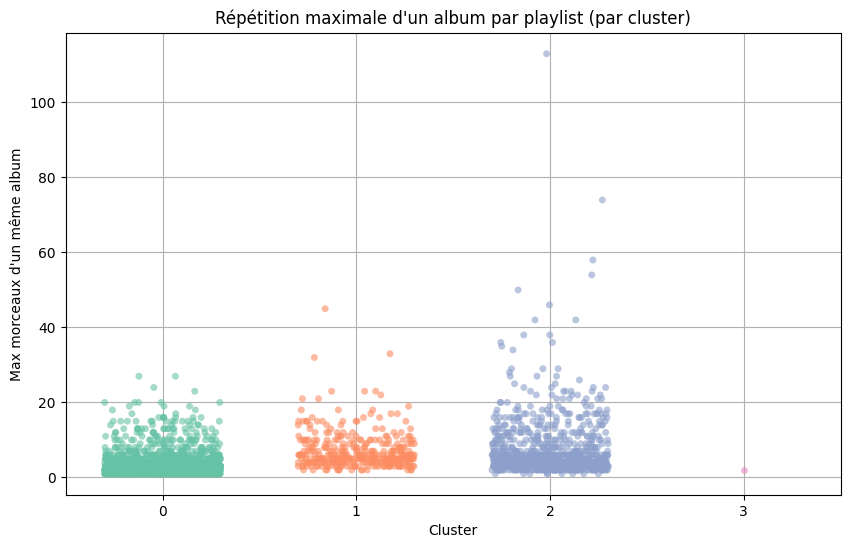

In [14]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='cluster', y='max_tracks_per_album', data=playlist_df, jitter=0.3, alpha=0.6, palette='Set2')
plt.title("Répétition maximale d'un album par playlist (par cluster)")
plt.xlabel("Cluster")
plt.ylabel("Max morceaux d'un même album")
plt.grid(True)
plt.show()

Clusters 0 et 1 : majorité des points ≤ 10 → les playlists de ces groupes peuvent confirmer l'hypothèse.
Cluster 2 : dispersion plus large, quelques points dépassent 20, 40, 60, jusqu'à 100 morceaux du même album → forte répétition dans certaines playlists → contredit partiellement l’hypothèse pour ce groupe.
Cluster 3 : un seul point (cas extrême isolé ?), avec répétition de 2 morceaux → cohérent avec l’hypothèse.

En conclusion, on peut considérer que l'hypothèse est vérifiée car elle reste valide dans la plupart des cas.

## Visualisation

Text(0.5, 0, 'Albums différents')

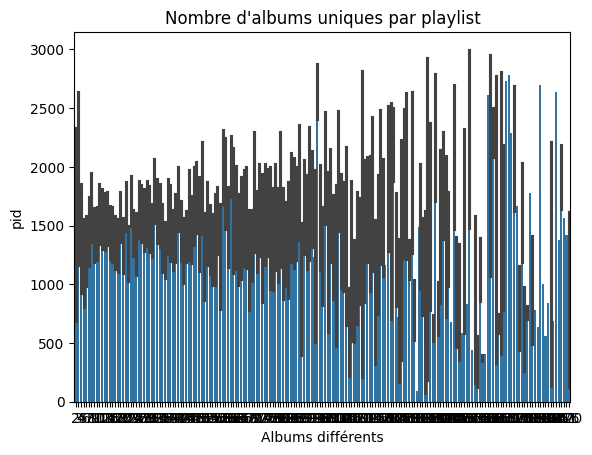

In [21]:
albums_per_playlist = df_3000.groupby('pid')['album_name'].nunique()
#sns.histplot(albums_per_playlist, bins=30)
sns.barplot(y=albums_per_playlist.index, x=albums_per_playlist.values)
plt.title("Nombre d'albums uniques par playlist")
plt.xlabel("Albums différents")

In [17]:
albums_per_playlist = df.groupby('pid')['album_name'].nunique()
print(albums_per_playlist)
print(albums_per_playlist.index)

pid
0        44
1        23
2        51
3       107
4        16
       ... 
9995     25
9996     45
9997     24
9998     12
9999     41
Name: album_name, Length: 10000, dtype: int64
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', name='pid', length=10000)


In [25]:
# Nombre de playlists différentes par artiste
artist_playlist_counts = df_3000.groupby('artist_name')['pid'].nunique().sort_values(ascending=False).head(3)

print("🎤 Top 3 artistes présents dans le plus grand nombre de playlists :")
print(artist_playlist_counts)

🎤 Top 3 artistes présents dans le plus grand nombre de playlists :
artist_name
Drake         583
Rihanna       448
The Weeknd    404
Name: pid, dtype: int64


In [26]:
# Nombre de playlists différentes par album
album_playlist_counts = df_3000.groupby('album_name')['pid'].nunique().sort_values(ascending=False).head(3)

print("\n💿 Top 3 albums présents dans le plus grand nombre de playlists :")
print(album_playlist_counts)


💿 Top 3 albums présents dans le plus grand nombre de playlists :
album_name
Greatest Hits    288
Views            286
Stoney           267
Name: pid, dtype: int64


/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2430918082.py:36: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


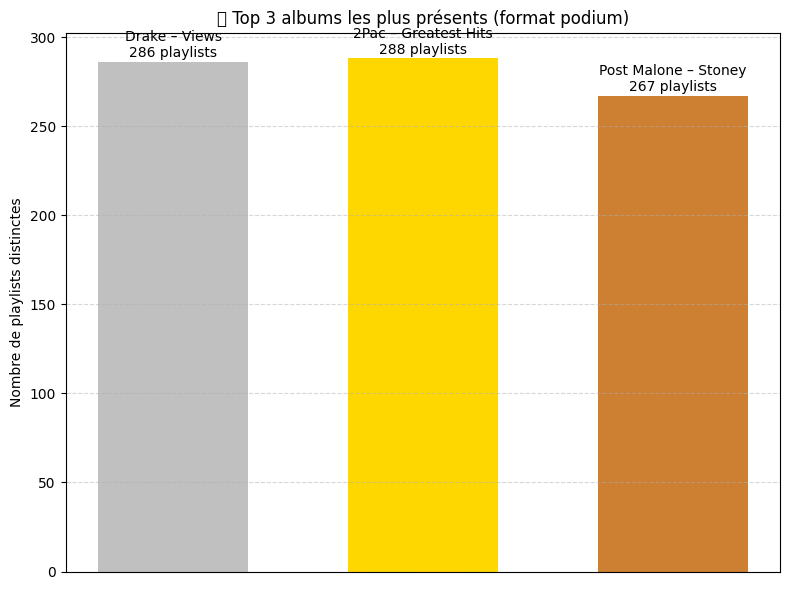

In [36]:
top_albums = df_3000.groupby('album_name')['pid'].nunique().sort_values(ascending=False).head(3)
top_album_names = top_albums.index.tolist()

album_artist_map = (
    df[df['album_name'].isin(top_album_names)]
    .groupby('album_name')['artist_name']
    .agg(lambda x: x.mode().iloc[0])  # artiste le plus fréquent pour l’album
)
album_labels = [f"{album_artist_map[album]} – {album}" for album in top_album_names]

# Données du podium
scores = top_albums.values
labels = album_labels

# Positions x du podium
positions = [1, 0, 2]  # index 0 = 1er au centre, 1 = 2e à gauche, 2 = 3e à droite
heights = [scores[0], scores[1], scores[2]]

# Couleurs personnalisées (or, argent, bronze)
colors = ['#FFD700', '#C0C0C0', '#cd7f32']

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, heights, width=0.6, color=colors)

# Ajout des annotations (valeurs et libellés)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{labels[i]}\n{int(scores[i])} playlists",
             ha='center', va='bottom', fontsize=10)

# Personnalisation
plt.xticks([])
plt.ylabel("Nombre de playlists distinctes")
plt.title("🏆 Top 3 albums les plus présents (format podium)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2022604073.py:29: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


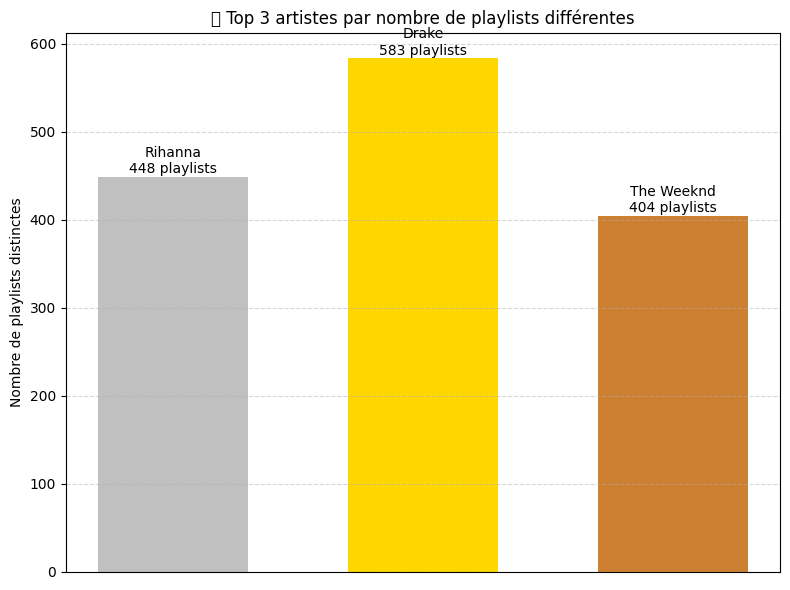

In [30]:
# Nombre de playlists différentes par artiste
artist_playlist_counts = df_3000.groupby('artist_name')['pid'].nunique().sort_values(ascending=False).head(3)

# Données du podium
scores = artist_playlist_counts.values
labels = artist_playlist_counts.index

# Positions x du podium
positions = [1, 0, 2]  # index 0 = 1er au centre, 1 = 2e à gauche, 2 = 3e à droite
heights = [scores[0], scores[1], scores[2]]

# Couleurs personnalisées (or, argent, bronze)
colors = ['#FFD700', '#C0C0C0', '#cd7f32']

plt.figure(figsize=(8, 6))
bars = plt.bar(positions, heights, width=0.6, color=colors)

# Ajout des annotations (valeurs et libellés)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{labels[i]}\n{int(scores[i])} playlists",
             ha='center', va='bottom', fontsize=10)

# Personnalisation
plt.xticks([])
plt.ylabel("Nombre de playlists distinctes")
plt.title("🏆 Top 3 artistes par nombre de playlists différentes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

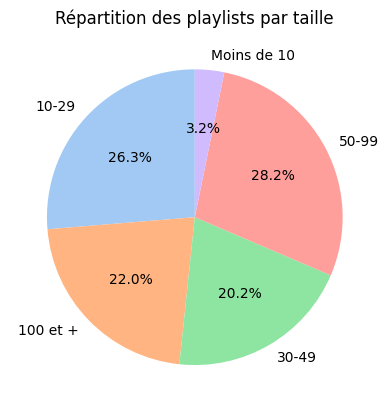

In [32]:
def classify_playlist_size(n):
    if n < 10:
        return 'Moins de 10'
    elif n < 30:
        return '10-29'
    elif n < 50:
        return '30-49'
    elif n < 100:
        return '50-99'
    else:
        return '100 et +'

df_3000['playlist_size'] = df_3000.groupby('pid')['track_uri'].transform('count')
playlist_size_class = df_3000[['pid', 'playlist_size']].drop_duplicates()
playlist_size_class['taille_cat'] = playlist_size_class['playlist_size'].apply(classify_playlist_size)

# Camembert
size_counts = playlist_size_class['taille_cat'].value_counts().sort_index()
size_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Répartition des playlists par taille")
plt.ylabel('')
plt.show()

/var/folders/_l/y23fyvr900n5x615w30dm59w0000gn/T/ipykernel_21398/2904518917.py:17: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/matylo/.pyenv/versions/my_ml_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


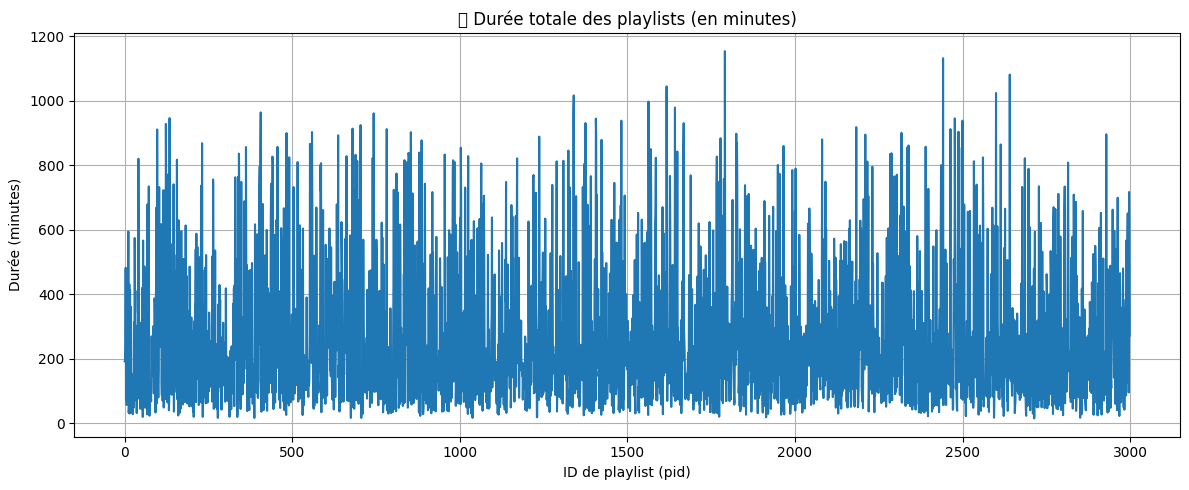

In [33]:
# 1. Durée totale par playlist
duration_per_playlist = df_3000.groupby('pid')['track_duration_ms'].sum().reset_index()

# 2. Conversion en minutes
duration_per_playlist['duration_minutes'] = duration_per_playlist['track_duration_ms'] / 60000

# 3. Tri des playlists par ID ou durée
duration_per_playlist = duration_per_playlist.sort_values('pid')  # ou .sort_values('duration_minutes')

# 4. Diagramme en ligne
plt.figure(figsize=(12, 5))
sns.lineplot(data=duration_per_playlist, x='pid', y='duration_minutes')
plt.title("⏱️ Durée totale des playlists (en minutes)")
plt.xlabel("ID de playlist (pid)")
plt.ylabel("Durée (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()